In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.datasets import make_blobs, make_circles
import random
import json
import math
import time
from tabulate import tabulate
from math import *
from kdtreen import *
from utils import *

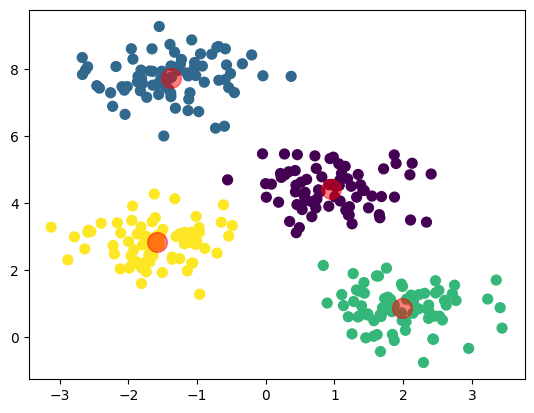

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.5)
plt.show()

In [2]:
savefile = "mst_datatest.json"
to_plot = False
no_points = 10000
no_centres = 2

In [3]:
if no_points > 999:
    to_plot = False

In [4]:

X, Y = make_blobs(n_samples=no_points, centers=no_centres)
points = list(set([(x, y) for x, y in X]))
# points = list(set([(round(x, 1), round(y, 1)) for x, y in X]))
print(len(points))

10000


In [5]:
dcran_start_time = time.time()
i_neighbors_dict = {}
tree = KDTree()
G = nx.Graph()

In [6]:
def build(points):
    global cordmap, i_neighbors_dict, tree, G
    tree.root = tree.build(points)
    limit_dist = math.ceil(log(len(points)))

    G.add_nodes_from(points)
    for point in points:
        i_neighbors_dict[point] = i_neighbors(tree, point, limit_dist)
    print("max dis : " ,limit_dist )
    return tree, G

In [7]:
def dcran(points):
    global cordmap, i_neighbors_dict, tree, G
    tree, G = build(points)

    for k in range(math.ceil(log(len(points)))):
        components = list(nx.connected_components(G))
        if len(components) == 1:
            break
        for component in components:
            for pointi in component:
                eudis, pointj = i_neighbors_dict[pointi][k]
                if pointj in component:
                    continue

                G.add_edge(pointi, pointj, weight=eudis)
    print(len(list(nx.connected_components(G))))

In [8]:
dcran(points)

max dis :  10
1


In [9]:
import numpy as np
from scipy.spatial import distance

core_points = []
components = list(nx.connected_components(G))

for component in components:
    points = np.array(list(component))
    centroid = points.mean(axis=0)
    distances = np.linalg.norm(points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = points[closest_point_index]
    core_points.append(closest_point)
    print(f"The closest point to the centroid in the component is {closest_point}")


The closest point to the centroid in the component is [-1.78303915  0.76056565]


In [ ]:
import numpy as np
from scipy.spatial import distance

core_points = []
components = list(nx.connected_components(G))

for component in components:
    points = np.array(list(component))
    centroid = points.mean(axis=0)
    distances = np.linalg.norm(points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = points[closest_point_index]
    core_points.append(closest_point)
    print(f"The closest point to the centroid in the component is {closest_point}")

In [10]:
core_points_x = sorted(enumerate(core_points), key=lambda x: x[1][0])
core_points_y = sorted(enumerate(core_points), key=lambda x: x[1][1])
tot_dis_x = 0
tot_dis_y = 0
for i in range(len(core_points_x)-1):
    tot_dis_x += distance.euclidean(core_points_x[i][1], core_points_x[i+1][1])
    tot_dis_y += distance.euclidean(core_points_y[i][1], core_points_y[i+1][1])

if tot_dis_x > tot_dis_y:
    core_points = core_points_y
else:
    core_points = core_points_x

In [11]:
mst = nx.minimum_spanning_tree(G, algorithm="prim", weight="weight")

In [12]:
dcran_end_time = time.time()
dcran_elapsed_time = dcran_end_time - dcran_start_time
print(dcran_elapsed_time)

2.0151989459991455


In [13]:
stmst_start_time = time.time()

Implement KNn from scratch

In [14]:



def calculate_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)


def create_distance_matrix(points):
    n = len(points)
    distance_matrix = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            distance = calculate_distance(points[i], points[j])
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    return distance_matrix


def primMST(graph):
    num_vertices = len(graph)
    key = [float("inf")] * num_vertices
    parent = [-1] * num_vertices
    mstSet = [False] * num_vertices
    key[0] = 0

    for cout in range(num_vertices):
        u = minKey(key, mstSet)
        mstSet[u] = True
        for v in range(num_vertices):
            if 0 < graph[u][v] < key[v] and mstSet[v] is False:
                key[v] = graph[u][v]
                parent[v] = u
    return parent


def minKey(key, mstSet):
    min = float("inf")
    min_index = -1
    for v in range(len(key)):
        if key[v] < min and not mstSet[v]:
            min, min_index = key[v], v
    return min_index


# Example list of points

# Create the distance matrix
distance_matrix = create_distance_matrix(points)

# Generate MST using Prim's algorithm
mst = primMST(distance_matrix)

# Print the edges in the MST


In [15]:
stmst_end_time = time.time()
stmst_elapsed_time = stmst_end_time - stmst_start_time
print(stmst_elapsed_time)   

95.11501884460449


In [16]:
stmst_elapsed_time/dcran_elapsed_time

47.198823239482195